In [5]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable
import random
import torch

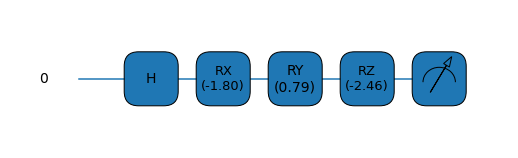

In [7]:
device = qml.device('qiskit.aer',wires=1, backend='qasm_simulator')
params = np.random.normal(0, np.pi/2, 3)
params = Variable(torch.tensor(params, requires_grad=True))

@qml.qnode(device, interface='torch')
def circuit(x, M=None):
    qml.Hadamard(wires=0)
    qml.RX(x[0], wires=0)
    qml.RY(x[1], wires=0)
    qml.RZ(x[2], wires=0)
    return qml.expval(qml.Hermitian(M, wires=[0]))

fig, ax = qml.draw_mpl(circuit, decimals=2)(params)
plt.show()


In [8]:
a = random.random()
b = (1-a**2)**0.5
target_state = np.array([a,b])
target_op = np.outer(target_state.conj(), target_state)
target_op = torch.tensor(target_op)
print(target_state)
print(target_op)

[0.69617797 0.71786923]
tensor([[0.4847, 0.4998],
        [0.4998, 0.5153]], dtype=torch.float64)
